In [1]:
import pandas as pd
from keplergl import KeplerGl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
building_coords = pd.read_csv('./buildings/chi0_90m_coord2bldg_smc.csv').drop(columns='MEAN_AVGHT')

building_coords

,BLDGID,Lat,Lon
0,1,41.867863,-87.628662
1,2,41.867859,-87.629822
2,4,41.867859,-87.629822
3,5,41.867863,-87.628662
4,10,41.867870,-87.626404
...,...,...,...
329,16526,41.886570,-87.624298
330,16941,41.886547,-87.625458
331,16953,41.886547,-87.625458
332,17163,41.887413,-87.624329


In [3]:
buildings = pd.read_excel('./processed_data/fullNoMorph.xlsx')
buildings.rename(columns={'bldgid':'BLDGID'}, inplace=True)

buildings

,BLDGID,area_total,elec_per_area_total,elec_total,Total Building Area Area [m2],Net Conditioned Building Area Area [m2],Heating Electricity [GJ],Heating Natural Gas [GJ],Cooling Electricity [GJ],Interior Lighting Electricity [GJ],...,Heating + Cooling [GJ],Heating + Cooling + Fans [GJ],Net Heating + Fans [GJ],% Heating (Heating and Cooling Only),% Cooling (Heating and Cooling Only),% Heating (All Energy Use),% Cooling + Fans (All Energy Use),"% Cooling + Fans (Heating Cooling, and Fans Only)","% Heating (Heating Cooling, and Fans Only)",Ratio Heating/Cooling
0,1,285.41,908.69,259.35,285.41,285.41,78.40,4.86,10.22,26.59,...,93.48,96.36,86.14,0.890672,0.109328,0.273450,0.043024,0.135949,0.864051,8.146771
1,2,313.14,942.95,295.28,313.14,313.14,104.53,3.22,13.15,29.18,...,120.90,124.72,111.57,0.891232,0.108768,0.318062,0.050093,0.136065,0.863935,8.193916
2,4,251.16,1207.21,303.20,251.16,251.16,122.96,0.80,15.26,23.40,...,139.02,143.47,128.21,0.890232,0.109768,0.359485,0.057252,0.137381,0.862619,8.110092
3,5,288.21,1146.20,330.35,288.21,288.21,139.65,0.95,17.20,26.85,...,157.80,162.84,145.64,0.891001,0.108999,0.378394,0.059854,0.136576,0.863424,8.174419
4,10,282.49,1255.94,354.79,282.49,282.49,167.71,0.25,12.66,26.32,...,180.62,187.82,175.16,0.929908,0.070092,0.424882,0.050239,0.105740,0.894260,13.266983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,16526,23135.86,369.43,8547.09,23135.86,23135.86,0.00,6492.39,303.72,2202.09,...,6796.11,6985.25,6681.53,0.955310,0.044690,0.429196,0.032582,0.070557,0.929443,21.376235
314,16941,21757.03,358.45,7798.86,21757.03,21757.03,2451.46,1116.84,408.21,2027.13,...,3976.51,4160.64,3752.43,0.897345,0.102655,0.391176,0.064935,0.142368,0.857632,8.741334
315,16953,48278.80,304.17,14685.02,48278.80,48278.80,0.00,10106.76,513.39,4595.21,...,10620.15,10900.56,10387.17,0.951659,0.048341,0.406234,0.031906,0.072822,0.927178,19.686320
316,17163,11660.55,484.14,5645.33,11660.55,11660.55,0.00,3839.10,174.62,1109.86,...,4013.72,4092.19,3917.57,0.956494,0.043506,0.401084,0.026441,0.061847,0.938153,21.985454


In [4]:
buildings = buildings.merge(building_coords, on='BLDGID', how='left')

buildings

,BLDGID,area_total,elec_per_area_total,elec_total,Total Building Area Area [m2],Net Conditioned Building Area Area [m2],Heating Electricity [GJ],Heating Natural Gas [GJ],Cooling Electricity [GJ],Interior Lighting Electricity [GJ],...,Net Heating + Fans [GJ],% Heating (Heating and Cooling Only),% Cooling (Heating and Cooling Only),% Heating (All Energy Use),% Cooling + Fans (All Energy Use),"% Cooling + Fans (Heating Cooling, and Fans Only)","% Heating (Heating Cooling, and Fans Only)",Ratio Heating/Cooling,Lat,Lon
0,1,285.41,908.69,259.35,285.41,285.41,78.40,4.86,10.22,26.59,...,86.14,0.890672,0.109328,0.273450,0.043024,0.135949,0.864051,8.146771,41.867863,-87.628662
1,2,313.14,942.95,295.28,313.14,313.14,104.53,3.22,13.15,29.18,...,111.57,0.891232,0.108768,0.318062,0.050093,0.136065,0.863935,8.193916,41.867859,-87.629822
2,4,251.16,1207.21,303.20,251.16,251.16,122.96,0.80,15.26,23.40,...,128.21,0.890232,0.109768,0.359485,0.057252,0.137381,0.862619,8.110092,41.867859,-87.629822
3,5,288.21,1146.20,330.35,288.21,288.21,139.65,0.95,17.20,26.85,...,145.64,0.891001,0.108999,0.378394,0.059854,0.136576,0.863424,8.174419,41.867863,-87.628662
4,10,282.49,1255.94,354.79,282.49,282.49,167.71,0.25,12.66,26.32,...,175.16,0.929908,0.070092,0.424882,0.050239,0.105740,0.894260,13.266983,41.867870,-87.626404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,16526,23135.86,369.43,8547.09,23135.86,23135.86,0.00,6492.39,303.72,2202.09,...,6681.53,0.955310,0.044690,0.429196,0.032582,0.070557,0.929443,21.376235,41.886570,-87.624298
314,16941,21757.03,358.45,7798.86,21757.03,21757.03,2451.46,1116.84,408.21,2027.13,...,3752.43,0.897345,0.102655,0.391176,0.064935,0.142368,0.857632,8.741334,41.886547,-87.625458
315,16953,48278.80,304.17,14685.02,48278.80,48278.80,0.00,10106.76,513.39,4595.21,...,10387.17,0.951659,0.048341,0.406234,0.031906,0.072822,0.927178,19.686320,41.886547,-87.625458
316,17163,11660.55,484.14,5645.33,11660.55,11660.55,0.00,3839.10,174.62,1109.86,...,3917.57,0.956494,0.043506,0.401084,0.026441,0.061847,0.938153,21.985454,41.887413,-87.624329


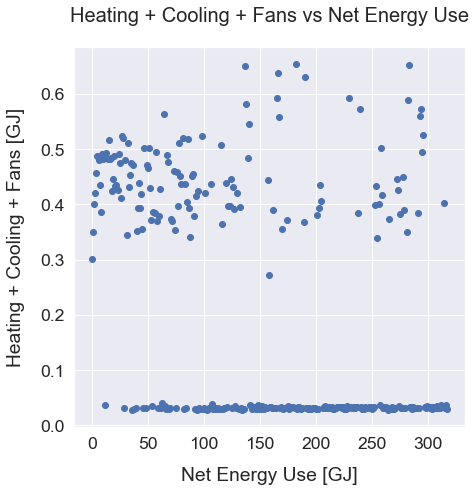

In [5]:
sns.set(font_scale=1.6)
fig7 = plt.figure(figsize=(7,7))

plt.scatter(buildings.index, buildings['Heating + Cooling + Fans [GJ]']/(buildings['Net Energy Use [GJ]'] + buildings['Total End Uses Water [m3]']))
plt.title('Heating + Cooling + Fans vs Net Energy Use', fontsize=20, y=1.05)
plt.xlabel('Net Energy Use [GJ]',labelpad=15)
plt.ylabel('Heating + Cooling + Fans [GJ]', labelpad=15)
plt.ticklabel_format(style='plain')
plt.show()

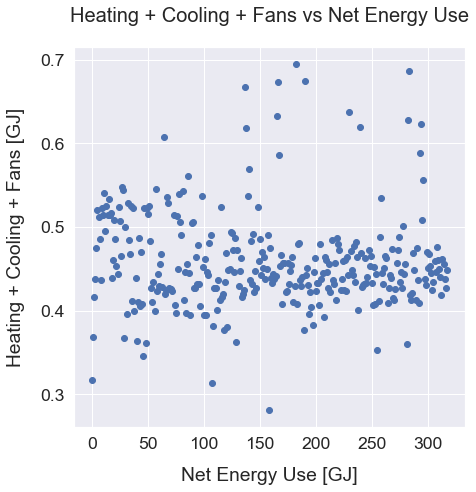

In [6]:
sns.set(font_scale=1.6)
fig7 = plt.figure(figsize=(7,7))

plt.scatter(buildings.index, buildings['Heating + Cooling + Fans [GJ]']/(buildings['Net Energy Use [GJ]']))
plt.title('Heating + Cooling + Fans vs Net Energy Use', fontsize=20, y=1.05)
plt.xlabel('Net Energy Use [GJ]',labelpad=15)
plt.ylabel('Heating + Cooling + Fans [GJ]', labelpad=15)
plt.ticklabel_format(style='plain')
plt.show()

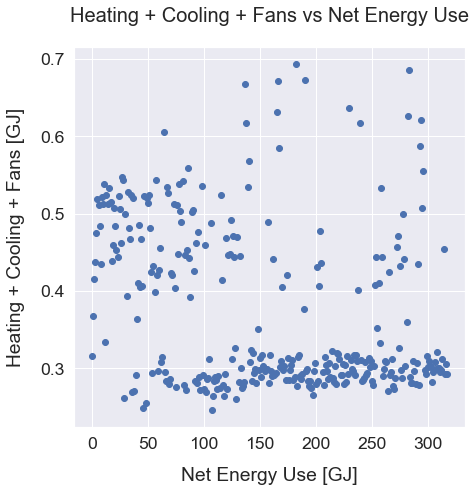

In [7]:
sns.set(font_scale=1.6)
fig7 = plt.figure(figsize=(7,7))

plt.scatter(buildings.index, buildings['Heating + Cooling + Fans [GJ]']/(buildings['Net Energy Use [GJ]'] + buildings['Total End Uses Water [m3]']/26.137))
plt.title('Heating + Cooling + Fans vs Net Energy Use', fontsize=20, y=1.05)
plt.xlabel('Net Energy Use [GJ]',labelpad=15)
plt.ylabel('Heating + Cooling + Fans [GJ]', labelpad=15)
plt.ticklabel_format(style='plain')
plt.show()

In [8]:
below = buildings.loc[buildings['Heating + Cooling + Fans [GJ]']/(buildings['Net Energy Use [GJ]'] + buildings['Total End Uses Water [m3]']/26.137) < .35]

below

,BLDGID,area_total,elec_per_area_total,elec_total,Total Building Area Area [m2],Net Conditioned Building Area Area [m2],Heating Electricity [GJ],Heating Natural Gas [GJ],Cooling Electricity [GJ],Interior Lighting Electricity [GJ],...,Net Heating + Fans [GJ],% Heating (Heating and Cooling Only),% Cooling (Heating and Cooling Only),% Heating (All Energy Use),% Cooling + Fans (All Energy Use),"% Cooling + Fans (Heating Cooling, and Fans Only)","% Heating (Heating Cooling, and Fans Only)",Ratio Heating/Cooling,Lat,Lon
0,1,285.41,908.69,259.35,285.41,285.41,78.4,4.86,10.22,26.59,...,86.14,0.890672,0.109328,0.273450,0.043024,0.135949,0.864051,8.146771,41.867863,-87.628662
12,20,57765.85,297.30,17173.97,57765.85,57765.85,0.0,14920.54,651.92,5498.20,...,15299.03,0.958136,0.041864,0.463631,0.032018,0.064599,0.935401,22.887072,41.867878,-87.625244
29,41,11190.57,492.02,5505.99,11190.57,11190.57,0.0,2867.85,154.54,1065.13,...,2950.55,0.948868,0.051132,0.338940,0.028038,0.076404,0.923596,18.557331,41.868675,-87.635529
36,52,65038.67,288.80,18783.02,65038.67,65038.67,0.0,11510.41,663.11,6190.43,...,11844.21,0.945528,0.054472,0.378871,0.032814,0.079706,0.920294,17.358221,41.867870,-87.627533
38,55,35773.80,321.91,11515.77,35773.80,35773.80,0.0,6809.12,369.37,3404.98,...,6995.42,0.948545,0.051455,0.369814,0.030179,0.075450,0.924550,18.434415,41.868725,-87.626404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,16395,10020.10,523.52,5245.72,10020.10,10020.10,0.0,3442.15,162.23,953.72,...,3516.90,0.954991,0.045009,0.392256,0.027005,0.064412,0.935588,21.217716,41.886547,-87.625458
313,16526,23135.86,369.43,8547.09,23135.86,23135.86,0.0,6492.39,303.72,2202.09,...,6681.53,0.955310,0.044690,0.429196,0.032582,0.070557,0.929443,21.376235,41.886570,-87.624298
315,16953,48278.80,304.17,14685.02,48278.80,48278.80,0.0,10106.76,513.39,4595.21,...,10387.17,0.951659,0.048341,0.406234,0.031906,0.072822,0.927178,19.686320,41.886547,-87.625458
316,17163,11660.55,484.14,5645.33,11660.55,11660.55,0.0,3839.10,174.62,1109.86,...,3917.57,0.956494,0.043506,0.401084,0.026441,0.061847,0.938153,21.985454,41.887413,-87.624329


In [9]:
above = buildings.loc[buildings['Heating + Cooling + Fans [GJ]']/(buildings['Net Energy Use [GJ]'] + buildings['Total End Uses Water [m3]']/26.137) > .35]

above

,BLDGID,area_total,elec_per_area_total,elec_total,Total Building Area Area [m2],Net Conditioned Building Area Area [m2],Heating Electricity [GJ],Heating Natural Gas [GJ],Cooling Electricity [GJ],Interior Lighting Electricity [GJ],...,Net Heating + Fans [GJ],% Heating (Heating and Cooling Only),% Cooling (Heating and Cooling Only),% Heating (All Energy Use),% Cooling + Fans (All Energy Use),"% Cooling + Fans (Heating Cooling, and Fans Only)","% Heating (Heating Cooling, and Fans Only)",Ratio Heating/Cooling,Lat,Lon
1,2,313.14,942.95,295.28,313.14,313.14,104.53,3.22,13.15,29.18,...,111.57,0.891232,0.108768,0.318062,0.050093,0.136065,0.863935,8.193916,41.867859,-87.629822
2,4,251.16,1207.21,303.20,251.16,251.16,122.96,0.80,15.26,23.40,...,128.21,0.890232,0.109768,0.359485,0.057252,0.137381,0.862619,8.110092,41.867859,-87.629822
3,5,288.21,1146.20,330.35,288.21,288.21,139.65,0.95,17.20,26.85,...,145.64,0.891001,0.108999,0.378394,0.059854,0.136576,0.863424,8.174419,41.867863,-87.628662
4,10,282.49,1255.94,354.79,282.49,282.49,167.71,0.25,12.66,26.32,...,175.16,0.929908,0.070092,0.424882,0.050239,0.105740,0.894260,13.266983,41.867870,-87.626404
5,11,754.84,790.93,597.03,754.84,754.84,282.08,5.72,35.97,70.33,...,298.64,0.888903,0.111097,0.447576,0.072797,0.139894,0.860106,8.001112,41.867859,-87.629822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,14794,641.13,1012.45,649.12,641.13,641.13,351.20,1.53,41.53,59.74,...,365.27,0.894663,0.105337,0.510522,0.078258,0.132915,0.867085,8.493378,41.885689,-87.627716
294,14933,6032.80,621.68,3750.45,6032.80,6032.80,2108.53,62.28,148.66,562.08,...,2268.35,0.935908,0.064092,0.559354,0.063439,0.101861,0.898139,14.602516,41.885670,-87.632263
295,14938,182.54,1852.61,338.17,182.54,182.54,162.03,0.09,24.28,17.01,...,168.10,0.869742,0.130258,0.428288,0.079941,0.157293,0.842707,6.677100,41.885662,-87.634552
296,14944,677.54,906.50,614.19,677.54,677.54,313.15,2.80,37.79,63.13,...,327.58,0.893170,0.106830,0.480708,0.075191,0.135260,0.864740,8.360677,41.885689,-87.627716


In [10]:
KeplerGl(height=600, data={'above': above, 'below': below})

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'above':      BLDGID  area_total  elec_per_area_total  elec_total  \
1         2      313.14   …

In [13]:
above2 = buildings.loc[buildings['Heating + Cooling + Fans [GJ]']/(buildings['Net Energy Use [GJ]'] + buildings['Total End Uses Water [m3]']) > .2]

below2 = buildings.loc[buildings['Heating + Cooling + Fans [GJ]']/(buildings['Net Energy Use [GJ]'] + buildings['Total End Uses Water [m3]']) < .2]

KeplerGl(height=600, data={'above': above2, 'below': below2})

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'above':      BLDGID  area_total  elec_per_area_total  elec_total  \
0         1      285.41   …

In [14]:
KeplerGl(height=600, data={'data':buildings})

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data':      BLDGID  area_total  elec_per_area_total  elec_total  \
0         1      285.41    …